# Contents-based-filtering



## 기본 데이터 형태 확인

In [205]:
import pandas as pd
import numpy

df1 = pd.read_csv('../../data/tmdb_5000_credits.csv')
df2 = pd.read_csv('../../data/tmdb_5000_movies.csv')

In [206]:
## credits의 데이터 정보 확인 ,,
df1.head()


,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [207]:
## movies의 데이터 정보 확인
df2.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [208]:
## 데이터 개수 확인
df1.shape, df2.shape

((4803, 4), (4803, 20))

## 데이터 통합작업
credits의 movie_id 열과 movies의 id 열을 기준으로 통합함
title 열은 두 곳에 전부 존재하니,
credits 의 title은 없애고 작업함

In [209]:
df1.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [210]:
### movie_id --> id로 변경
df1.columns = ['id', 'title', 'cast', 'crew']
df1.columns

Index(['id', 'title', 'cast', 'crew'], dtype='object')

In [211]:
### title을 뺀 데이터 불러오기 
df1[['id',  'cast', 'crew']]

,id,cast,crew
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...
4798,9367,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [212]:
### df2에 df1을 병합, 병합기준 = 'id'
df2 = df2.merge(df1[['id',  'cast', 'crew']],on='id')
df2.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


## 평점 가중치를 통해 평점에 대한 신뢰도를 얻기
여기서 평점에 대한 정보를 얻는 이유는, 
아무리 개인화를 맞추어서 콘텐츠 기반의 추천을 한다고 해도, 결국엔 재미있게 보는것이 목적이기 때문에 상위 x%의 영화만을 추천하기 위함, 혹은 비슷한 레벨 안에서는 평점순으로 추천해주기 위함입니다.

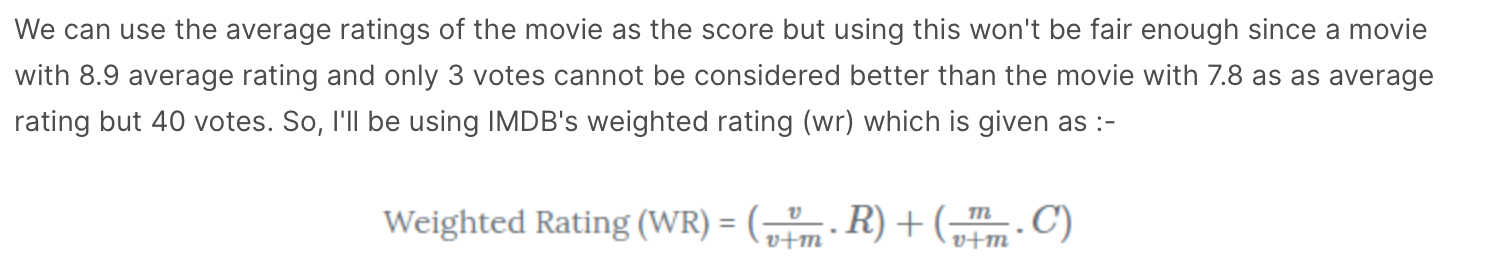

v = 영화의 추천 수<br>
m = 차트 내, 최소한의 추천 수<br>
R = 영화의 평균 점수<br>
C = 차트 내, 전체 영화의 평균 점수<br>

위 가중치 공식을 이용합니다.<br>
출처 - https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system/notebook

In [213]:
### 전체 영화의 평균 점수
C = df2['vote_average'].mean()
C

6.092171559442011

In [214]:
# 상위 10%(하위 90%)에 해당하는 평가 수를 계산
m = df2['vote_count'].quantile(0.9) 
m

1838.4000000000015

In [215]:
# 상위 10% 의 평가 수를 가진 영화들만 q_movies에 저장
q_movies = df2.copy().loc[df2['vote_count']>=m]
q_movies.shape

(481, 22)

In [216]:
## 가중치 계산 함수
def weighted_rating(x,m=m,C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m)*R) + (m/(v+m)*C)

In [217]:
## score라는 열을 생성하며, 해당 열에 weighted_rating 함수를 계산한 값을 넣어줌
## row 단위 계산
q_movies['score'] = q_movies.apply(weighted_rating,axis = 1)
q_movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.665696
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.239396


In [218]:
q_movies = q_movies.sort_values('score',ascending=False)
q_movies[['title','vote_count','vote_average','score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


## 컨텐츠(텍스트) 분석하기
피쳐 벡터화(Feature Vectorization), BOW 모델 이용, stop words 이용


TF-IDF Vectorizer 를 이용합니다.<br>
(countVectorizer 와 결과 비교도 해보자 ,,)

In [219]:

## 줄거리 확인
df2['overview'].head(3)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
Name: overview, dtype: object

In [220]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')## 불용어 적용

In [221]:
## null값 가진 overview 가 있는지 확인
df2['overview'].isnull().values.any()

True

In [222]:
# null 값을 빈문자열로 변환
df2['overview'] = df2['overview'].fillna('')

In [223]:
### overview 를 벡터화
tfidf_matrix = tfidf.fit_transform(df2['overview'])
tfidf_matrix.shape

(4803, 20978)

## 코사인 유사도 적용
벡터화된 데이터간 코사인 유사도를 확인하여 얼마나 비슷한 컨텐츠인지 점수를 매길 수 있음

In [224]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)
cosine_sim.shape

(4803, 4803)

In [225]:
## title에 각 index를 매칭
indices = pd.Series(df2.index,index= df2['title']).drop_duplicates()
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [226]:
## 아래처럼 인덱스를 통해 영화정보에 접근 가능
df2.iloc[[4]]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### 그러면 어떻게 필터버블을 해소할 수 있을까 ?

결국 필터버블 = 편향성 ,,

그러면 내가 선호하는 것과 오히려 반대의 영화를 추천해준다면 효과가 있지 않을까?

대신 추천해준, 반대 성향의 영화는 추천리스트에 넣지 말고 매번 추천 할 때마다 그 즉시 껴넣는 것으로 !!

그러면 추천을 해줄 때, 코사인 유사도가 높은 것을 많이 추천해주고,

오히려 코사인 유사도 하위 10~20%의 영화를 추천해줘 보자.

In [313]:
def get_recommendation(title,cosine_sim=cosine_sim):
    ## 영화 제목을 통해 영화의 인덱스 값 불러오기
    idx = indices[title]
    ## 코사인 유사도에서 idx(특정 영화)에 해당하는 유사도 값만 불러오기
    sim_scores = list(enumerate(cosine_sim[idx]))

    ## 유사도 값(sim_scores[1])을 내림차순으로 정렬
    sim_scores = sorted(sim_scores,key=lambda x: x[1], reverse=True)
    ## 자기자신(0번 인덱스)를 제외한 10개의 추천 영화를 슬라이싱

    sim_scores = sim_scores[1:11]
#     sim_scores2 = sim_scores[len(sim_scores)-3:len(sim_scores)-1]



    ## 추출된 정보를
    movie_indicies = [i[0] for i in sim_scores]
#     movie_indicies2 = [i[0] for i in sim_scores2]

    return df2['title'].iloc[movie_indicies]
    




In [318]:
df2['title'][:20]

0                                          Avatar
1        Pirates of the Caribbean: At World's End
2                                         Spectre
3                           The Dark Knight Rises
4                                     John Carter
5                                    Spider-Man 3
6                                         Tangled
7                         Avengers: Age of Ultron
8          Harry Potter and the Half-Blood Prince
9              Batman v Superman: Dawn of Justice
10                               Superman Returns
11                              Quantum of Solace
12     Pirates of the Caribbean: Dead Man's Chest
13                                The Lone Ranger
14                                   Man of Steel
15       The Chronicles of Narnia: Prince Caspian
16                                   The Avengers
17    Pirates of the Caribbean: On Stranger Tides
18                                 Men in Black 3
19      The Hobbit: The Battle of the Five Armies


In [319]:
get_recommendation('Avengers: Age of Ultron')

16                    The Avengers
79                      Iron Man 2
68                        Iron Man
26      Captain America: Civil War
227                 Knight and Day
31                      Iron Man 3
1868            Cradle 2 the Grave
344                    Unstoppable
1922                    Gettysburg
531        The Man from U.N.C.L.E.
Name: title, dtype: object

#### 1차적 결과,,
다른 스토리, 다른 분위기의 영화가 추천되었음을 확인할 수 있었다.
다만 해당 영화(반대 선호도의)는 전체적으로 보아도 인기나 관객수가 적음을 알 수 있었다.
따라서 이후에는 평점 가중치를 적용하여 "재미"라는 기대치에 부응할 수 있도록 해본다.



## 장르, 감독, 배우 그리고 키워드를 추가적으로 이용하기
기본적으로 줄거리 뿐만이 아니라, 장르나 감독, 키워드 또한 사용자 선호도에 영향을 많이 끼치기 때문에 이에 대한 점수도 따로 계산할 수 있도록 한다. 

추후, 필터버블 해소에 있어서 사용자의 선호 배우, 장르, 감독등은 유지한 채로 줄거리가 다른 영화를 추천하는 등의 방법에도 적용해본다.

(선호도의 확장)


In [228]:
### 우선 문자열인 리스트를 리스트로 바꿔주기
from ast import literal_eval
features = ['cast','crew','keywords','genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [229]:
import numpy as np

In [230]:

## 감독 찾아내기 함수
def get_director(x):
    for i in x:
        i['job'] == 'Director'
        return i['name']
    return np.nan

In [231]:
## 감독정보만 따로 저장
df2['director'] = df2['crew'].apply(get_director)

In [232]:

df2['keywords']

0       [{'id': 1463, 'name': 'culture clash'}, {'id':...
1       [{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...
2       [{'id': 470, 'name': 'spy'}, {'id': 818, 'name...
3       [{'id': 849, 'name': 'dc comics'}, {'id': 853,...
4       [{'id': 818, 'name': 'based on novel'}, {'id':...
                              ...                        
4798    [{'id': 5616, 'name': 'united states–mexico ba...
4799                                                   []
4800    [{'id': 248, 'name': 'date'}, {'id': 699, 'nam...
4801                                                   []
4802    [{'id': 1523, 'name': 'obsession'}, {'id': 224...
Name: keywords, Length: 4803, dtype: object

In [233]:
## 데이터 중에서 name에 해당하는 value만 추출

def get_list(x):
    if isinstance(x,list):
        names = [i['name'] for i in x]
        if len(names)>3:
            names = names[:3]
        return names
    return  []

In [234]:
features = ['cast','keywords','genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

                                      

In [235]:
df2[['title','cast','director','keywords','genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",Stephen E. Rivkin,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Dariusz Wolski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Thomas Newman,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [236]:
## 공백을 제거하고 소문자화 하여 벡터 값 찾을때 일관성 있도록해주기

def clean_data(x):
    if isinstance(x,list):
        return [str.lower(i.replace(' ','')) for i in x]
    else:
        if isinstance(x,str):
            return str.lower(x.replace(' ',''))
        else:
            return ''

In [237]:
features = ['cast','keywords','director','genres']
for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [238]:
df2[['title','cast','director','keywords','genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[samworthington, zoesaldana, sigourneyweaver]",stephene.rivkin,"[cultureclash, future, spacewar]","[action, adventure, fantasy]"
1,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]",dariuszwolski,"[ocean, drugabuse, exoticisland]","[adventure, fantasy, action]"
2,Spectre,"[danielcraig, christophwaltz, léaseydoux]",thomasnewman,"[spy, basedonnovel, secretagent]","[action, adventure, crime]"


In [239]:
## keywords, cast, director, genres 를 모두 띄어쓰기로 구분된 하나의 요소로 만들어줌
def create_soup(x):
    return ' '.join(x['keywords'])+' +' .join(x['cast'])+' '+x['director']+ ' '+ ' '.join(x['genres'])


In [240]:

df2['soup'] = df2.apply(create_soup,axis=1)
df2['soup'].head(3)

0    cultureclash future spacewarsamworthington +zo...
1    ocean drugabuse exoticislandjohnnydepp +orland...
2    spy basedonnovel secretagentdanielcraig +chris...
Name: soup, dtype: object

### 감독, 키워드, 등장인물, 장르에 대한 벡터화 및 유사도 판별

In [241]:
## countVectorizer 적용

from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words= 'english')
count_matrix = count.fit_transform(df2['soup'])


In [242]:
## 코사인 유사도 구하기

from sklearn.metrics.pairwise import cosine_similarity
cosine_sim2 = cosine_similarity(count_matrix,count_matrix)
cosine_sim2

array([[1.        , 0.31622777, 0.21081851, ..., 0.        , 0.        ,
        0.        ],
       [0.31622777, 1.        , 0.22222222, ..., 0.        , 0.        ,
        0.        ],
       [0.21081851, 0.22222222, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [243]:
## 인덱스 정보 새로 적용하기

# df2 = df2.reset_index()

## title 정보를 기반으로 인덱스를 설정
indices = pd.Series(df2.index,index= df2['title'])
indices


title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [317]:
get_recommendation('Up',cosine_sim2)

42                                            Toy Story 3
118                                           Ratatouille
231                                        Monsters, Inc.
343                                           Toy Story 2
1541                                            Toy Story
57                                                 WALL·E
1983                                     Meet the Deedles
3114                                          Elsa & Fred
3403    Alpha and Omega: The Legend of the Saw Tooth Cave
34                                    Monsters University
Name: title, dtype: object

## 데이터를 파일로 만들기

영화에 관한 데이터와 코사인 유사도 데이터를 파일로 만들어 내보낸다.

In [321]:
import pickle

movies = df2[['id','title']].copy()
movies.head(3)

,id,title
0,19995,Avatar
1,285,Pirates of the Caribbean: At World's End
2,206647,Spectre


In [326]:
## movies 데이터를 movies.pickle 이란 이름으로 쓰기저장
pickle.dump(movies,open('movies.pickle2','wb'))

In [323]:
## 코사인 유사도를 cosine_sim.pickle 로 저장
pickle.dump(cosine_sim2,open('cosine_sim.pickle','wb'))

## cosine 유사도에 여러가지 파라미터 적용하기 

현재 cosine_sim 은 줄거리 기반 유사도

cosine_sim2 은 배우, 감독, 키워드, 장르별 유사도

cosine_sim2의 요소를 배우 및감독 , 키워드 및 장르로 나누어서 
cosine_sim에 추가


In [354]:
## 배우 및 감독으로 나누기 

def create_soup1(x):
    return x['director']+ ' '+ ' '.join(x['cast'])
    
## 키워드 및 장르로 나누기
def create_soup2(x):
    return ' '.join(x['keywords'])+ ' '+ ' '.join(x['genres'])

In [348]:
df2['soup1'] = df2.apply(create_soup1,axis=1)
df2['soup1'].head(3)

0    stephene.rivkin samworthington zoesaldana sigo...
1    dariuszwolski johnnydepp orlandobloom keirakni...
2    thomasnewman danielcraig christophwaltz léasey...
Name: soup1, dtype: object

In [353]:
df2['soup2'] = df2.apply(create_soup2,axis=1)
df2['soup2'].head(3)

0    cultureclash future spacewar action adventure ...
1    ocean drugabuse exoticisland adventure fantasy...
2    spy basedonnovel secretagent action adventure ...
Name: soup2, dtype: object

### 코사인 유사도 구하기


In [356]:
## countVectorizer 적용

from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words= 'english')
count_matrix_cast = count.fit_transform(df2['soup1'])
count_matrix_genres = count.fit_transform(df2['soup2'])

## 코사인 유사도 구하기


from sklearn.metrics.pairwise import cosine_similarity
cosine_sim_cast = cosine_similarity(count_matrix_cast,count_matrix_cast)
cosine_sim_genres = cosine_similarity(count_matrix_genres,count_matrix_genres)




In [358]:
get_recommendation('Up',cosine_sim_genres)

1983                                     Meet the Deedles
3403    Alpha and Omega: The Legend of the Saw Tooth Cave
966                                             Marmaduke
2165                                               Shorts
2182                               Pooh's Heffalump Movie
2538                             The Lizzie McGuire Movie
2679                                            Superstar
2744                                             Snow Day
2833                              Johnson Family Vacation
3038                                Hey Arnold! The Movie
Name: title, dtype: object